In [11]:
!pip install matplotlib
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/104.0 kB ? eta -:--:--
     ---------- -------------------------- 30.7/104.0 kB 435.7 kB/s eta 0:00:01
     --------------------- --------------- 61.4/104.0 kB 465.5 kB/s eta 0:00:01
     -----------------------------------  102.4/104.0 kB 590.8 kB/s eta 0:00:01
     ------------------------------------ 104.0/104.0 kB 498.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.8 kB 991.0 kB/s eta 0:00:01
    


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\samia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/11.6 MB 825.8 kB/s eta 0:00:14
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 657.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 341.3 kB/s eta 0:00:34
   ---------------------------------------- 


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\samia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
df = pd.read_csv("cleaned_ebay_deals.csv")

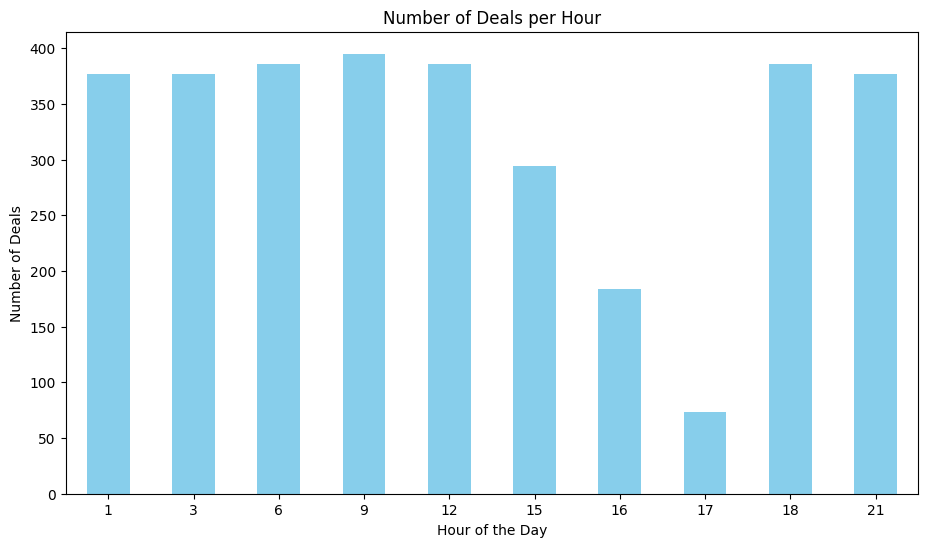

In [15]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])
df = df.sort_values("Timestamp")
df["Hour"] = df["Timestamp"].dt.hour
deals_per_hour = df.groupby("Hour").size()

plt.figure(figsize=(11, 6))
deals_per_hour.plot(kind="bar", color="skyblue")
plt.title("Number of Deals per Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Deals")
plt.xticks(rotation=0)
plt.show()

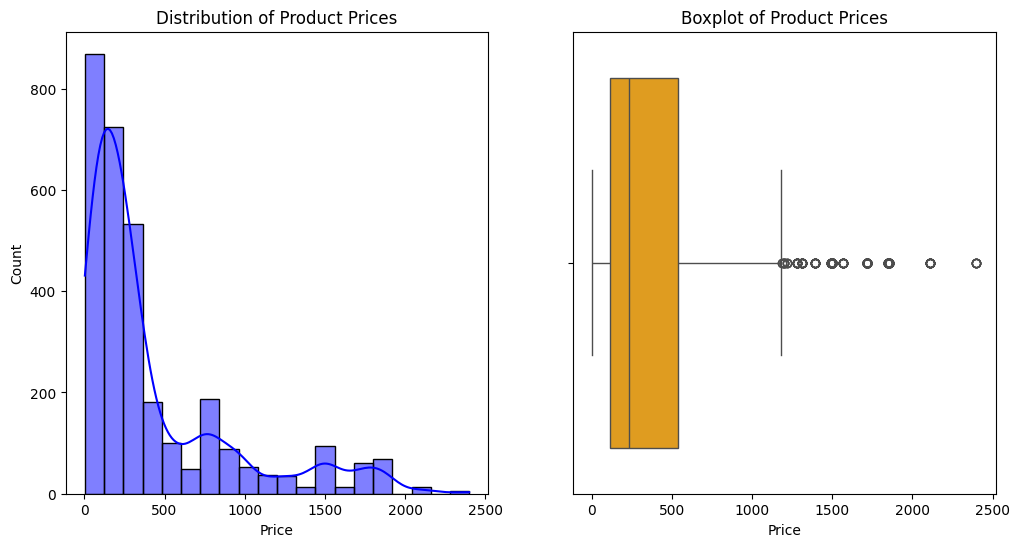

In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df["Price"], bins=20, kde=True, color="blue")
plt.title("Distribution of Product Prices")
plt.xlabel("Price")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Price"], color="orange")
plt.title("Boxplot of Product Prices")
plt.xlabel("Price")
plt.show()

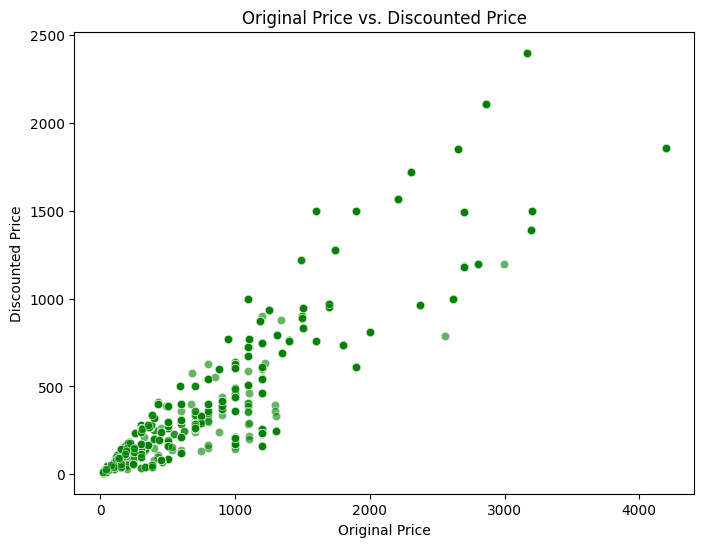

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Original_price", y="Price", data=df, alpha=0.6, color="green")
plt.title("Original Price vs. Discounted Price")
plt.xlabel("Original Price")
plt.ylabel("Discounted Price")
plt.show()


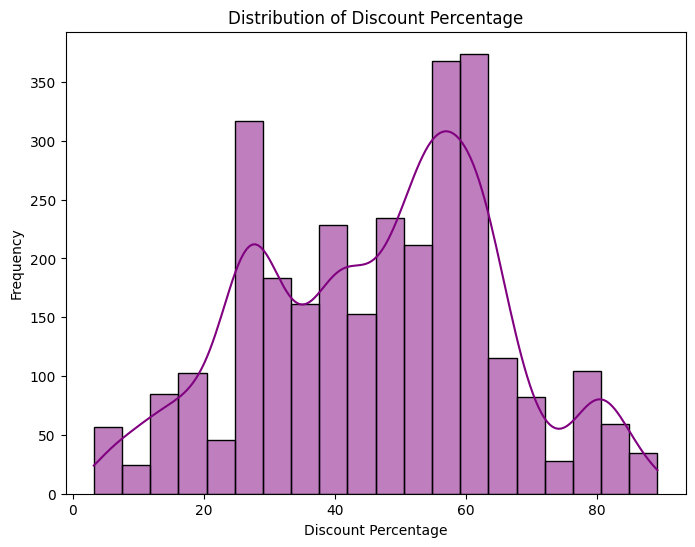

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(df["Discount_percentage"], bins=20, kde=True, color="purple")
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount Percentage")
plt.ylabel("Frequency")
plt.show()

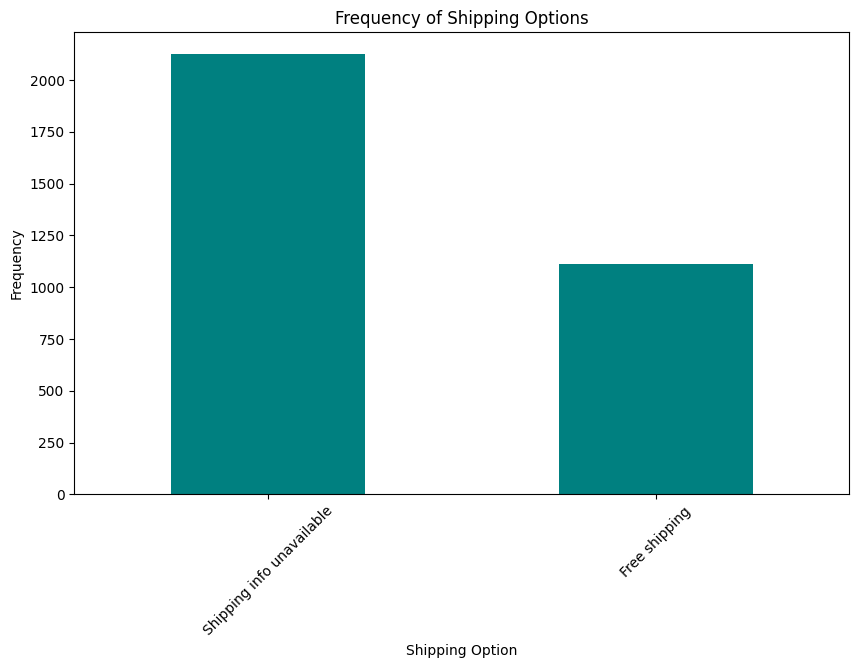

In [12]:
shipping_counts = df["Shipping"].value_counts()

plt.figure(figsize=(10, 6))
shipping_counts.plot(kind="bar", color="teal")
plt.title("Frequency of Shipping Options")
plt.xlabel("Shipping Option")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [13]:
keywords = ["Apple", "Samsung", "Laptop", "iPhone", "Tablet", "Gimbal"]

In [14]:
keyword_counts = {keyword: df["Title"].str.contains(keyword, case=False).sum() for keyword in keywords}

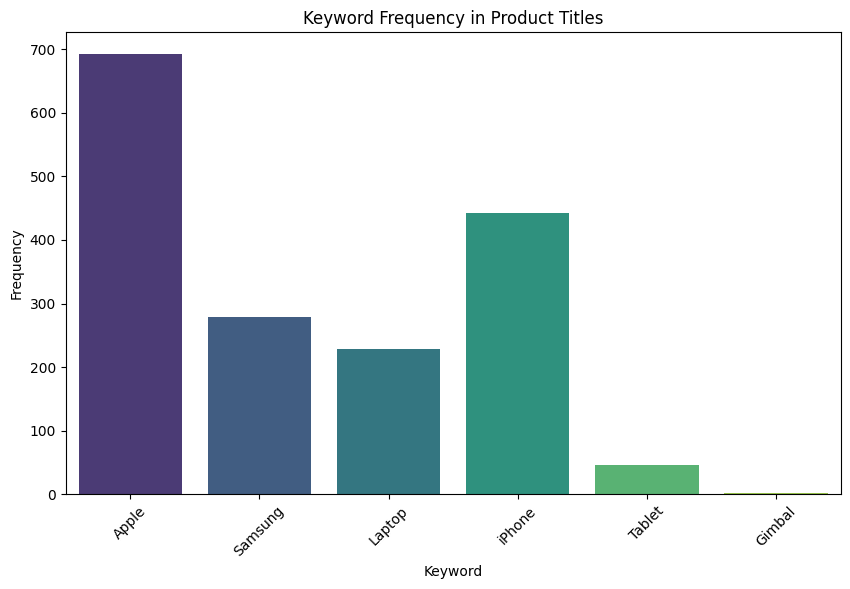

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=list(keyword_counts.keys()), 
    y=list(keyword_counts.values()), 
    hue=list(keyword_counts.keys()),
    palette="viridis", 
    legend=False  # Disable the legend
)
plt.title("Keyword Frequency in Product Titles")
plt.xlabel("Keyword")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

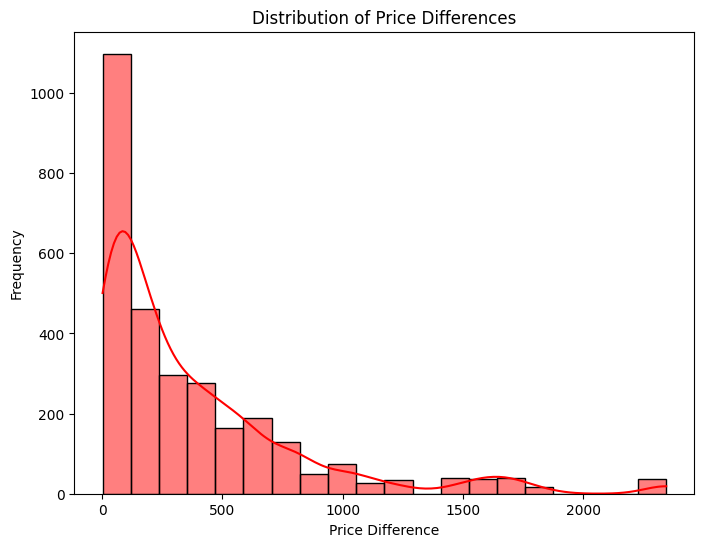

In [21]:
df["Price_difference"] = df["Original_price"] - df["Price"]

plt.figure(figsize=(8, 6))
sns.histplot(df["Price_difference"], bins=20, kde=True, color="red")
plt.title("Distribution of Price Differences")
plt.xlabel("Price Difference")
plt.ylabel("Frequency")
plt.show()

In [23]:
df_sorted = df.sort_values("Discount_percentage", ascending=False)
df_unique = df_sorted.drop_duplicates(subset=["Title", "Price", "Original_price"])

top_5_unique_deals = df_unique.head(5)
print("Top 5 Unique Deals with the Highest Discounts:")
display(top_5_unique_deals[["Title", "Price", "Original_price", "Discount_percentage"]])

Top 5 Unique Deals with the Highest Discounts:


,Title,Price,Original_price,Discount_percentage
2482,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,40.99,379.99,89.21
954,Samsung Galaxy Watch4 44mm R870 GPS - Good,37.99,299.99,87.34
1146,ASUS Zenfone V V520KL A006 32GB Verizon - Exce...,41.95,329.00,87.25
1640,Samsung Galaxy Watch4 Classic 46mm R890 GPS - ...,49.99,379.99,86.84
1915,Samsung Galaxy S21 5G SM-G991U 128GB 256GB Unl...,159.95,1199.99,86.67
